In [1]:
import sys
print(sys.executable)
import pandas as pd
import matplotlib.pyplot as plt
#import pycircos
import scipy.sparse as sp
from scipy.sparse import csr_matrix 
import sys 
import os
import glob
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import collections
import matplotlib
import math
#from pycircos.pycircos import Garc
#from pycircos.pycircos import Gcircle 

/software/cellgen/team274/lr26/miniforge3/envs/my-python/bin/python


In [4]:
# set base directory
base_dir = "/lustre/scratch126/cellgen/behjati/lr26/PacBio-severus/"

In [8]:
import pandas as pd

# Step 1: Read the files into DataFrames
df1 = pd.read_csv(base_dir + 'tumor_breakpoints_double.csv', sep=",")
df2=pd.read_csv(base_dir + '1C01breakpoints_double.csv', sep=",")
df3 = pd.read_csv(base_dir + '1B02breakpoints_double.csv', sep=",")

# Step 2: Identify the shared rows based on #BP_pos1:BP_pos2
# Assuming '#BP_pos1:BP_pos2' is the column containing the breakpoints

# Combine df2 and df3 to find all shared rows
shared_df = pd.concat([df2[['#BP_pos1:BP_pos2']], df3[['#BP_pos1:BP_pos2']]])

# Remove duplicates to get only unique shared rows
shared_rows = shared_df.drop_duplicates()

shared_rows.to_csv(base_dir + 'blood_mom_germline_breakpoints.csv', sep=",", index=False)
# Step 3: Filter out rows from df1 that are present in shared_rows
# Merge df1 with shared_rows to keep only unique rows
# Combined filter
filtered_df = df1[
    (~df1['#BP_pos1:BP_pos2'].isin(shared_rows['#BP_pos1:BP_pos2'])) & 
    (df1['tumor-all_pbmm2-farm22.bam_support'] > 2)
]

# Step 4: Save the filtered DataFrame to a new file
filtered_df.to_csv(base_dir + 'tumor_somatic_breakpoints_double.csv', sep=",", index=False)
# Debug: Check the result
print(filtered_df.head())


            #BP_pos1:BP_pos2 tumor-all_pbmm2-farm22.bam_PASS/FAIL  \
0  +chr1:215308|-chr1:215348                                 PASS   
2  +chr1:216515|-chr1:216889                                 PASS   
4  +chr1:218797|-chr1:218824                                 PASS   
5  +chr1:219003|-chr1:219025                                 PASS   
6  +chr1:219870|-chr1:220262                                 PASS   

   tumor-all_pbmm2-farm22.bam_support  tumor-all_pbmm2-farm22.bam_spanning_1  \
0                                   4                                     81   
2                                   3                                     80   
4                                   5                                     77   
5                                   6                                     77   
6                                   3                                     76   

   tumor-all_pbmm2-farm22.bam_spanning_2  Unnamed: 5  
0                                     81         

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv(base_dir + "breakpoints_double.csv", sep=",")

# Extract chromosome numbers and positions
df[['chr1', 'pos1', 'chr2', 'pos2']] = df.iloc[:, 0].str.extract(r'[\+\-]?chr([\dXY]+):(\d+)\|[\+\-]?chr([\dXY]+):(\d+)')

# Convert positions to integers
df[['pos1', 'pos2']] = df[['pos1', 'pos2']].astype(float)

# Keep only rows where the status is 'PASS'
df_filtered = df[df.iloc[:, 1] == 'PASS']

# Remove rows where BP2 (chr2) is NaN (i.e., missing second chromosome)
df_filt = df_filtered.dropna(subset=['chr2'])

# Keep only breakpoints that are >10kb apart
df_filt = df_filt[(df_filt['chr1'] != df_filt['chr2']) | (abs(df_filt['pos1'] - df_filt['pos2']) > 150000)]

# Output the filtered DataFrame
df_filt


,#BP_pos1:BP_pos2,tumor_all_hifi_reads_pbmm2.bam_PASS/FAIL,tumor_all_hifi_reads_pbmm2.bam_support,tumor_all_hifi_reads_pbmm2.bam_spanning_1,tumor_all_hifi_reads_pbmm2.bam_spanning_2,blood_1C01_hifi_reads_pbmm2.bam_PASS/FAIL,blood_1C01_hifi_reads_pbmm2.bam_support,blood_1C01_hifi_reads_pbmm2.bam_spanning_1,blood_1C01_hifi_reads_pbmm2.bam_spanning_2,Unnamed: 9,chr1,pos1,chr2,pos2
2385,+chr10:952173|+chr19:45062732,PASS,20,26,30,NaN,0,0,0,NaN,10,952173.0,19,45062732.0
2389,-chr10:983299|+chr19:45114512,PASS,32,24,25,NaN,0,0,0,NaN,10,983299.0,19,45114512.0
2633,-chr10:18795912|+chr1:80782817,PASS,24,63,20,PASS,15,30,27,NaN,10,18795912.0,1,80782817.0
2634,+chr10:18795926|-chr1:80776762,PASS,26,70,27,PASS,8,40,33,NaN,10,18795926.0,1,80776762.0
2815,+chr10:39262064|-chr1:126724161,PASS,2,60,45,NaN,0,0,0,NaN,10,39262064.0,1,126724161.0
2982,+chr10:42293119|-chr1:127565100,PASS,3,45,71,PASS,2,13,33,NaN,10,42293119.0,1,127565100.0
3373,+chr10:91367848|+chr2:211698420,PASS,2,79,35,NaN,0,0,0,NaN,10,91367848.0,2,211698420.0
3826,-chr11:97877|-chr5:139633354,PASS,9,58,46,PASS,2,33,30,NaN,11,97877.0,5,139633354.0
5418,+chr12:33003428|+chr15:98149294,PASS,2,36,38,PASS,1,32,25,NaN,12,33003428.0,15,98149294.0
6016,+chr12:103950483|+chr12:125324812,PASS,12,57,38,PASS,7,37,27,NaN,12,103950483.0,12,125324812.0


In [6]:
import pandas as pd

# Define the data for T2T chromosomes (from the vcf header)
data = [
    ("chr1", 1, 248387328),
    ("chr2", 1, 242696752),
    ("chr3", 1, 201105948),
    ("chr4", 1, 193574945),
    ("chr5", 1, 182045439),
    ("chr6", 1, 172126628),
    ("chr7", 1, 160567428),
    ("chr8", 1, 146259331),
    ("chr9", 1, 150617247),
    ("chr10", 1, 134758134),
    ("chr11", 1, 135127769),
    ("chr12", 1, 133324548),
    ("chr13", 1, 113566686),
    ("chr14", 1, 101161492),
    ("chr15", 1, 99753195),
    ("chr16", 1, 96330374),
    ("chr17", 1, 84276897),
    ("chr18", 1, 80542538),
    ("chr19", 1, 61707364),
    ("chr20", 1, 66210255),
    ("chr21", 1, 45090682),
    ("chr22", 1, 51324926),
    ("chrX", 1, 154259566),
    ("chrY", 1, 62460029),
    ("chrM", 1, 16569)
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Chromosome", "Start", "End"])

# Display the DataFrame
print(df)

df.to_csv("chromosome_data.csv", index=False)

   Chromosome  Start        End
0        chr1      1  248387328
1        chr2      1  242696752
2        chr3      1  201105948
3        chr4      1  193574945
4        chr5      1  182045439
5        chr6      1  172126628
6        chr7      1  160567428
7        chr8      1  146259331
8        chr9      1  150617247
9       chr10      1  134758134
10      chr11      1  135127769
11      chr12      1  133324548
12      chr13      1  113566686
13      chr14      1  101161492
14      chr15      1   99753195
15      chr16      1   96330374
16      chr17      1   84276897
17      chr18      1   80542538
18      chr19      1   61707364
19      chr20      1   66210255
20      chr21      1   45090682
21      chr22      1   51324926
22       chrX      1  154259566
23       chrY      1   62460029
24       chrM      1      16569


In [43]:
import pandas as pd
import re

# Sample DataFrame (assuming 'df_filt' is already defined)
data = df_filt  # This will be your existing dataframe with 'bppos1bppos2' column

# Create DataFrame
df = pd.DataFrame(data)

# Function to process and split the 'bppos1bppos2' format
def process_bp_pos(bppos):
    # Ensure we have a valid input with two parts separated by a pipe
    parts = bppos.split("|") if isinstance(bppos, str) else []
    
    # Check if we have exactly two parts to avoid index errors
    if len(parts) != 2:
        return [None] * 6  # Return None if we do not have two parts
    
    # Extract chr1 and chr2 (remove '+' and '-' signs)
    match1 = re.match(r'([+-]?chr\w+):(\d+)', parts[0])
    match2 = re.match(r'([+-]?chr\w+):(\d+)', parts[1])
    
    if match1 and match2:
        chr1 = match1.group(1).lstrip('+-')  # Remove '+' or '-' signs
        pos1 = int(match1.group(2))
        chr2 = match2.group(1).lstrip('+-')  # Remove '+' or '-' signs
        pos2 = int(match2.group(2))
        
        # Return the parsed data in the form of a list
        return [chr1, pos1, pos1 + 1, chr2, pos2, pos2 + 1]
    
    return [None] * 6  # Return None if no match

# Apply the function to the DataFrame to split the 'bppos1bppos2' column
df[['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2']] = df['#BP_pos1:BP_pos2'].apply(process_bp_pos).apply(pd.Series)

# Display the resulting DataFrame
print(df[['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2']])
df[['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2']].to_csv("tumor_somatic_breakpoints_same_diff_chr_ready_for_plotting.csv", index=False)

       chr1     start1       end1   chr2     start2       end2
86     chr1  111368234  111368235   chr1   26640864   26640865
653   chr10     952173     952174  chr19   45062732   45062733
654   chr10     983299     983300  chr19   45114512   45114513
904   chr10   42293119   42293120   chr1  127565100  127565101
1215  chr11      30141      30142   chr1     115075     115076
1219  chr11      97877      97878   chr5  139633354  139633355
2222  chr14    2109767    2109768  chr15    4707151    4707152
2292  chr14    7573801    7573802  chr21    8852184    8852185
2298  chr14    7930910    7930911  chr21    8483995    8483996
2392  chr10   68058908   68058909  chr14   18207652   18207653
3096  chr16   32862336   32862337  chr16   34619759   34619760
3219  chr16   41461927   41461928  chr16   46642202   46642203
3227  chr16   41797214   41797215  chr16   49777736   49777737
3540  chr11  104689625  104689626  chr17    9529752    9529753
4199  chr19   45085571   45085572   chr1  128421253  12

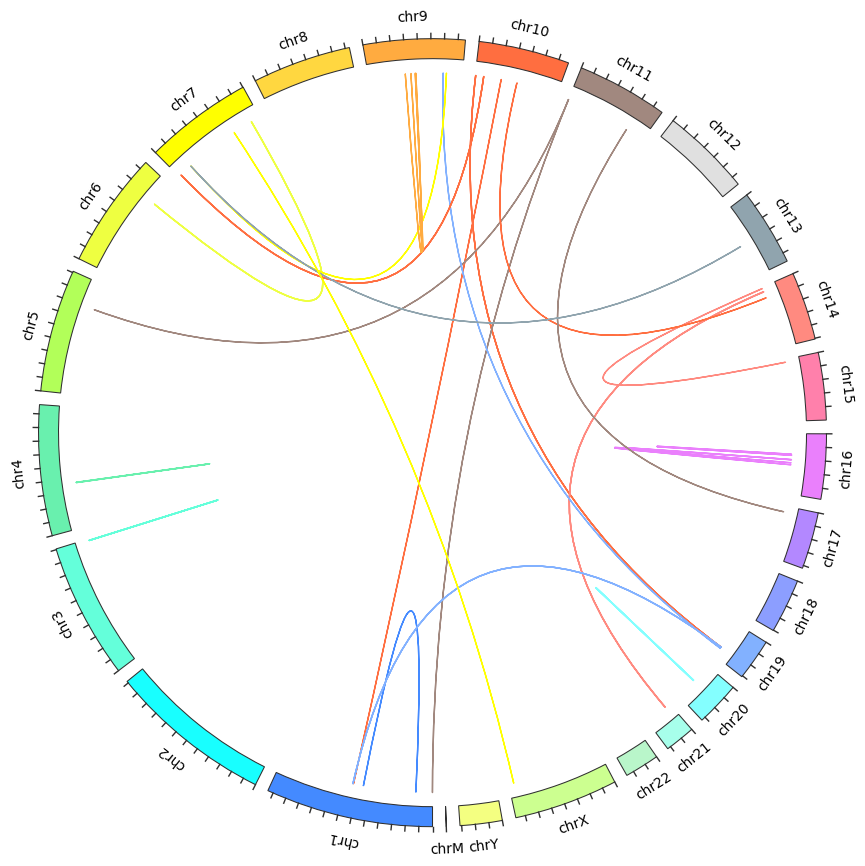

In [46]:
#Set chromosomes
circle = Gcircle(figsize=(8,8)) 
with open("chromosome_data.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)
        circle.add_garc(arc) 
        
circle.set_garcs(-180, 180)  # Ensure full circle

for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=20000000, ticklabels=None)

with open("tumor_somatic_breakpoints_same_diff_chr_ready_for_plotting.csv") as f:
    next(f)  # Skip header line
    for line in f:
        line = line.rstrip().split(",")
        name1, start1, end1 = line[0], int(line[1]), int(line[2])
        name2, start2, end2 = line[3], int(line[4]), int(line[5])

        # Get facecolors from the arc dictionary
        facecolor1 = circle.garc_dict[name1].facecolor if name1 in circle.garc_dict else "gray"
        facecolor2 = circle.garc_dict[name2].facecolor if name2 in circle.garc_dict else "gray"

        # Draw the chord
        source = (name1, start1, end1, 900)
        destination = (name2, start2, end2, 900)
        circle.chord_plot(source, destination, facecolor=facecolor1, edgecolor=facecolor1, linewidth=1)


In [47]:
circle.figure.savefig("severus_bndvars_tum_filtered_same_different_new.pdf", dpi=300, bbox_inches="tight")

In [20]:
import pandas as pd

# Load the data
file_path = "/lustre/scratch126/casm/team274sb/lr26/nanomonsv-new-patient-data/output/tumor-all/tumor-all.nanomonsv.result.vcf"

col_names = ["#CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT", "TUMOR", "CONTROL"]
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	TUMOR	CONTROL
# Read the file (ensure it handles variable column counts)
df = pd.read_csv(file_path, comment='#', sep="\t", names=col_names)  # Read as strings to avoid conversion issues

# Remove rows where ALT is <INS> or <DEL>
df_filtered = df[~df["ALT"].isin(["<INS>", "<DEL>", "<DUP>"])]

#print(df.columns)

#print(df)
# Save the filtered data
#output_path = base_dir + "filtered_patient_fin.vcf"
#df_filtered.to_csv(output_path, sep="\t", index=False)

#print(f"Filtered file saved as {output_path}")
#
print(df_filtered.columns)

print(df_filtered)


Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'TUMOR', 'CONTROL'],
      dtype='object')
    #CHROM        POS       ID REF  \
1     chr1  127679390   r_15_0   t   
2    chr10   42132975   r_15_1   g   
5    chr14    4693164  r_115_0   c   
6    chr21    6479593  r_115_1   t   
10   chr17   67516181  r_175_0   c   
..     ...        ...      ...  ..   
583   chr7    3833279   r_43_1   t   
586   chr1  118871778   r_11_0   a   
587  chr15   48704366   r_11_1   g   
618   chr6   32377110  r_345_0   a   
619   chr8  112199756  r_345_1   a   

                                                   ALT QUAL FILTER  \
1    ]chr10:42132975]ATATGGAATGCAATGGAATGGAATGGAATT...    .   PASS   
2    gTTTCATTCCATTCCTTTCCATTCCATTTCATTCCATTCCATTCCA...    .   PASS   
5                                cCCTTC]chr21:6479593]    .   PASS   
6                                tGAAGG]chr14:4693164]    .   PASS   
10                                   ]chr22:17477917]a    .   P

In [15]:
dup_count = df_filtered["ALT"].str.count("<DUP>").sum()
dup_count
df_dup = df_filtered[df_filtered["ALT"].str.contains("<DUP>")]
df_dup[["#CHROM", "POS", "ALT"]]

,#CHROM,POS,ALT
55,chr20,32374380,<DUP>
97,chr17,22010318,<DUP>
119,chr22,7229008,<DUP>
234,chr17,22020511,<DUP>
240,chr4,8600197,<DUP>
367,chr14,28900379,<DUP>
389,chr7,58430706,<DUP>
406,chr2,91218573,<DUP>
520,chrX,51675591,<DUP>
568,chr14,100902588,<DUP>


In [21]:
df_filtered.to_csv("/lustre/scratch126/casm/team274sb/lr26/nanomonsv-new-patient-data/output/tumor-all/tumor-all-filtered-bnd.nanomonsv.result.tsv", sep="\t", index=False)

In [17]:
def extract_svinlen(info):
    for item in info.split(";"):
        if item.startswith("SVINSLEN="):
            return int(item.split("=")[1])  # Convert to integer
    return None  # Return None if SVINSLEN is missing

# Function to check if SVTYPE is BND
def is_svtype_bnd(info):
    return any(item == "SVTYPE=BND" for item in info.split(";"))

# Extract SVINSLEN values
df_filtered["SVINSLEN"] = df_filtered["INFO"].apply(extract_svinlen)

# Filter rows:
df_filt = df_filtered[
    (df_filtered["FILTER"] == "PASS") &                 # Only PASS
    df_filtered["INFO"].apply(is_svtype_bnd) &          # Only SVTYPE=BND
    (df_filtered["SVINSLEN"].notna()) & (df_filtered["SVINSLEN"] < 20)  # Only SVINSLEN < 20
]

# Print or save the filtered data
print(df_filt[["#CHROM", "POS", "ALT", "FILTER", "INFO", "SVINSLEN"]])

    #CHROM        POS                                    ALT FILTER  \
5    chr14    4693164                  cCCTTC]chr21:6479593]   PASS   
6    chr21    6479593                  tGAAGG]chr14:4693164]   PASS   
45   chr12   25678789  AAAAAAAAAAAAAAAAAAAA]chr12:125324812]   PASS   
46   chr12  125324812   cTTTTTTTTTTTTTTTTTTT]chr12:25678789]   PASS   
70   chr10     952213           GGACAGCTCCCA]chr19:45062733]   PASS   
71   chr19   45062733             ATGGGAGCTGTC]chr10:952213]   PASS   
134  chr12   14047362         aTAAAATAAAAAAA]chr22:27234748]   PASS   
135  chr22   27234748         TTTTTTTTATTTTA]chr12:14047362]   PASS   
143  chr22   45707202                     TG]chr8:129952981]   PASS   
144   chr8  129952981                     cC]chr22:45707202]   PASS   
222  chr11  104689625           cTTTTTTTTTTTT]chr17:9529752]   PASS   
223  chr17    9529752         AAAAAAAAAAAAA]chr11:104689625]   PASS   
242   chr7   22646200            [chr9:145235338[ATTATTATTAa   PASS   
243   

/tmp/ipykernel_8517/349204830.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["SVINSLEN"] = df_filtered["INFO"].apply(extract_svinlen)


In [2]:
# Load the data
file_path = "/lustre/scratch126/casm/team274sb/lr26/nanomonsv-new-patient-data/output/tumor-all/tumor-all-filtered-bnd.nanomonsv.result.tsv"

col_names = ["#CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT", "TUMOR", "CONTROL"]
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	TUMOR	CONTROL
# Read the file (ensure it handles variable column counts)
df = pd.read_csv(file_path, comment='#', sep="\t", names=col_names)  # Read as strings to avoid conversion issues

In [24]:

import pandas as pd
import re

def parse_alt(alt):
    match = re.search(r'[\[\]]?([ACGTN]{0,20}?)?(chr[\wXYM]+):(\d+)[ACGTN]{0,20}?[\[\]]?', str(alt))
    if match:
        return match.group(2), int(match.group(3))  # Extract chromosome and position
    return None, None

# Apply the parse_alt function to the ALT column and create new columns for chr2 and start2
df[['chr2', 'start2']] = df['ALT'].dropna().apply(lambda alt: pd.Series(parse_alt(alt)))

# Debug: Check after applying function
print("🔍 After ALT Parsing:")
print(df[['ALT', 'chr2', 'start2']].head())

df['end1'] = df['POS'] + 1
df['end2'] = df['start2'] + 1

df = df[['#CHROM', 'POS', 'end1', 'chr2', 'start2', 'end2']].rename(
    columns={'#CHROM': 'chr1', 'POS': 'start1'}
)

# Debug: Check final DataFrame
print("🔍 Final DataFrame:")
print(df.head())

# Save to file
df.to_csv("/lustre/scratch126/casm/team274sb/lr26/nanomonsv-new-patient-data/output/tumor-all/filtered_tumor_somatic_bnd_nanomon_plotting.tsv", sep="\t", index=False)
df.to_csv("/lustre/scratch126/casm/team274sb/lr26/nanomonsv-new-patient-data/output/tumor-all/filtered_tumor_somatic_bnd_nanomon_plotting.csv", sep=",", index=False)

print("✅ Successfully processed data!")

🔍 After ALT Parsing:
                                                 ALT   chr2     start2
0  ]chr10:42132975]ATATGGAATGCAATGGAATGGAATGGAATT...  chr10   42132975
1  gTTTCATTCCATTCCTTTCCATTCCATTTCATTCCATTCCATTCCA...   chr1  127679390
2                              cCCTTC]chr21:6479593]  chr21    6479593
3                              tGAAGG]chr14:4693164]  chr14    4693164
4                                  ]chr22:17477917]a  chr22   17477917
🔍 Final DataFrame:
    chr1     start1       end1   chr2     start2       end2
0   chr1  127679390  127679391  chr10   42132975   42132976
1  chr10   42132975   42132976   chr1  127679390  127679391
2  chr14    4693164    4693165  chr21    6479593    6479594
3  chr21    6479593    6479594  chr14    4693164    4693165
4  chr17   67516181   67516182  chr22   17477917   17477918
✅ Successfully processed data!


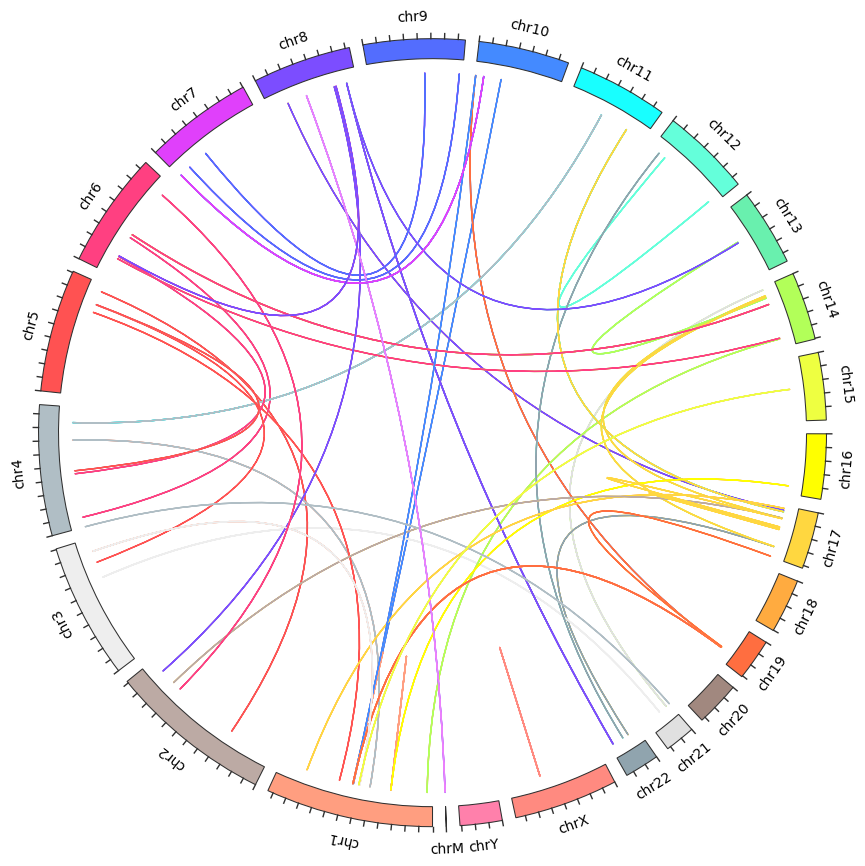

In [5]:
#Set chromosomes
circle = Gcircle(figsize=(8,8)) 
with open("/lustre/scratch126/casm/team274sb/lr26/sawfish/chromosome_data.csv") as f:
    f.readline()
    for line in f:
        line   = line.rstrip().split(",") 
        name   = line[0]
        length = int(line[-1]) 
        arc    = Garc(arc_id=name, size=length, interspace=2, raxis_range=(935,985), labelposition=80, label_visible=True)
        circle.add_garc(arc) 
        
circle.set_garcs(-180, 180)  # Ensure full circle

for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, raxis_range=(985,1000), tickinterval=20000000, ticklabels=None)

with open("/lustre/scratch126/casm/team274sb/lr26/nanomonsv-new-patient-data/output/tumor-all/filtered_tumor_somatic_bnd_nanomon_plotting.csv") as f:
    next(f)  # Skip header line
    for line in f:
        line = line.rstrip().split(",")
        name1, start1, end1 = line[0], int(line[1]), int(line[2])
        name2, start2, end2 = line[3], int(line[4]), int(line[5])

        # Get facecolors from the arc dictionary
        facecolor1 = circle.garc_dict[name1].facecolor if name1 in circle.garc_dict else "gray"
        facecolor2 = circle.garc_dict[name2].facecolor if name2 in circle.garc_dict else "gray"

        # Draw the chord
        source = (name1, start1, end1, 900)
        destination = (name2, start2, end2, 900)
        circle.chord_plot(source, destination, facecolor=facecolor1, edgecolor=facecolor1, linewidth=1)


In [6]:
circle.figure.savefig("/lustre/scratch126/casm/team274sb/lr26/nanomonsv-new-patient-data/output/tumor-all/filtered_tumor_somatic_bnd_nanomon_plotting.pdf", dpi=300, bbox_inches="tight")